## Question
- You are provided with the Breast Cancer Wisconsin (Diagnostic) dataset, which contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The features describe characteristics of the cell nuclei present in the image, and the task is to classify tumors as either malignant (label 1) or benign (label 0).

- Dataset Information:
- Dataset: Breast Cancer Wisconsin (Diagnostic) Dataset
- Features: 30 real-valued features computed for each cell nucleus
- Target: Binary classification - Malignant (1) or Benign (0)
- Number of Instances: 569
- Number of Features: 30

- Questions:
- Using the provided dataset, perform the following tasks:
- Load the Breast Cancer dataset using scikit-learn.
- Preprocess the dataset by performing necessary steps such as handling missing values, scaling features, and splitting the data into training and testing sets (use 80% of the data for training and 20% for testing).
- Implement at least three different classification algorithms from scikit-learn, such as Support Vector Machines (SVM), Decision Trees, and Random Forests.
- Tune the hyperparameters for each classifier using GridSearchCV or RandomizedSearchCV with 5-fold cross-validation.
- Train each classifier on the training data and evaluate their performance on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
- Provide interpretations and comparisons of the results obtained from different classifiers.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, classification_report

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# dropping the column without index(Unnamed:32)
df = df.dropna(axis=1)

In [8]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# Checking the data types of columns 
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
df.shape

(569, 32)

In [11]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
df['diagnosis'].head(5)

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

<AxesSubplot: xlabel='count', ylabel='diagnosis'>

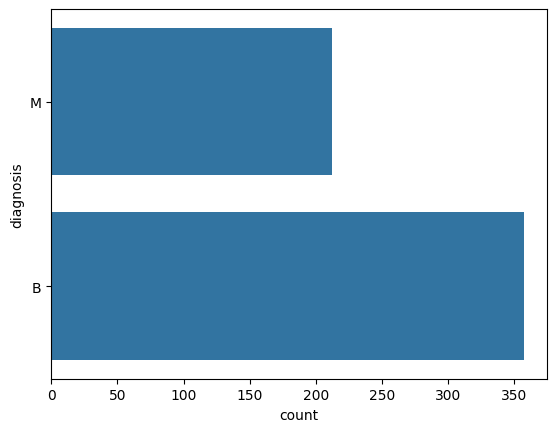

In [13]:
sns.countplot(df['diagnosis'], label='count')

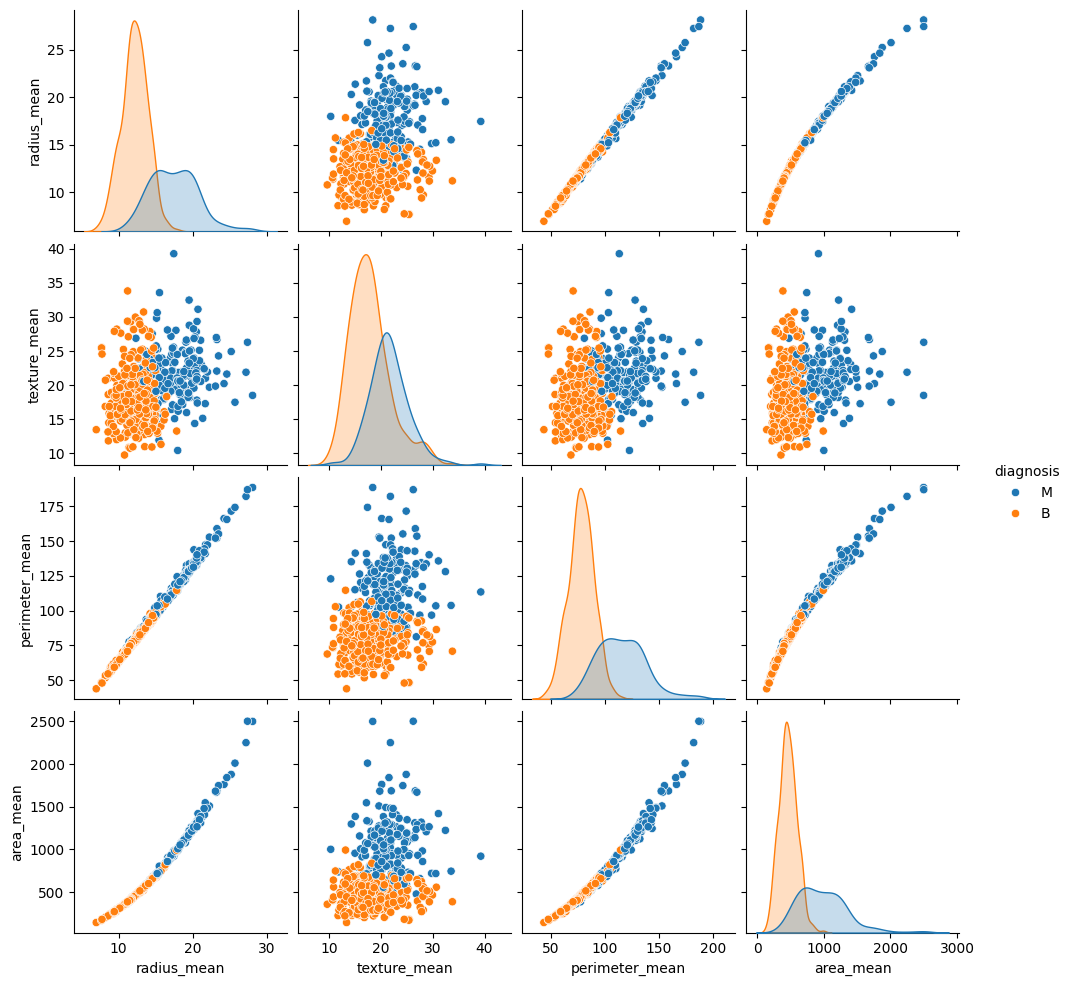

In [14]:
#check the pairs with the main features
sns.pairplot(df.iloc[:,1:6], hue='diagnosis')

In [15]:
# Dropping column id as it has no impact on the output
df.drop(columns=['id'], inplace=True)

<AxesSubplot: >

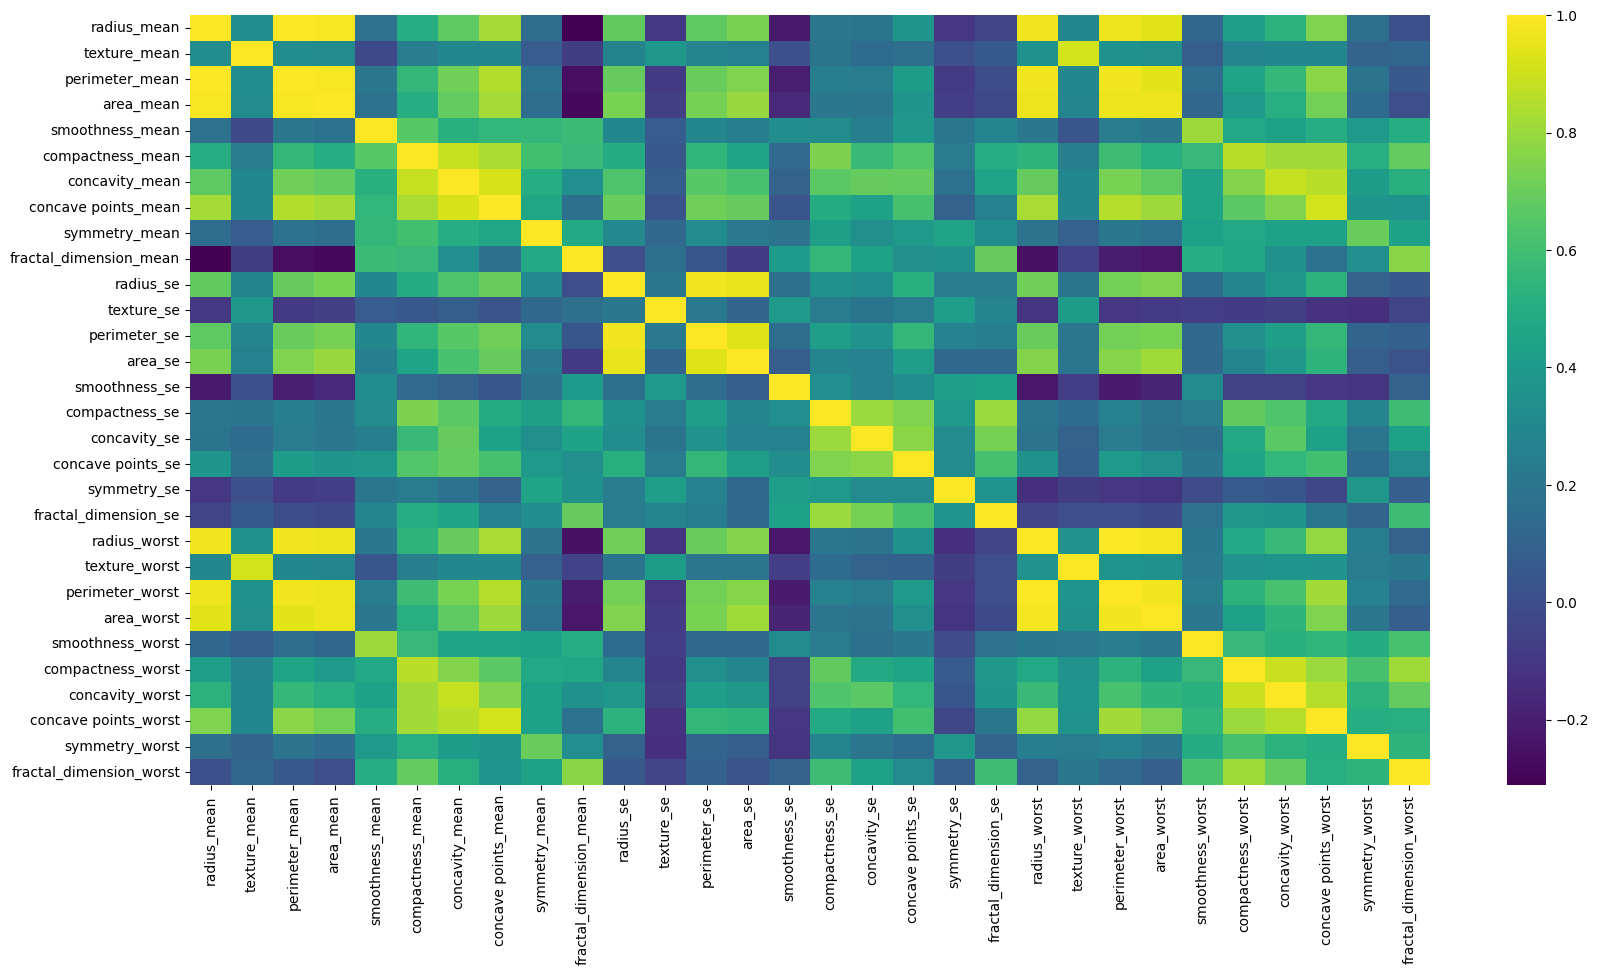

In [16]:
# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), cmap='viridis')

In [17]:
# Converting the dependent variable to a binary values for classification
df['diagnosis'] = df['diagnosis'].map({'M' : 1, 'B' : 0})


In [18]:
## Seperating the dependent and independent variable
y = df['diagnosis']
X = df.drop(columns=['diagnosis'])

In [19]:
# Scaling the data using StandardScaler 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Splitting the data into 80% training data and 20% testing data 
X_train,X_test,y_train, y_test = train_test_split(X_scaled, y, random_state=42, train_size=0.8)

### Support Vector Machine(SVM) implementation

In [21]:
from sklearn.svm import SVC


In [22]:
svm = SVC()

In [23]:
svm.fit(X_train,y_train)

SVC()

In [24]:
predict = svm.predict(X_test)

In [25]:
rocauc = roc_auc_score(y_test, predict)
rocauc

0.9697019325253848

In [26]:
class_report = classification_report(y_test, predict)
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



##### Summary
- SVM has high precision for both classes which means it predicts the tumor class more accuratelty
- Recall is also high which means the model predicts class 0(Benign) class 99% accurately while 95% accurately for class 1(Malignant)
- F1-Score is also acceptable with higher accuracy

### Decision Tree Classifier

In [27]:
decisiontree = DecisionTreeClassifier()

In [28]:
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
pred = decisiontree.predict(X_test)

In [30]:
class_report = classification_report(y_true=y_test, y_pred=pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



##### Summary
- Decision Tree has slightly lower precision for class 1 then class 0 which means it predicts the class 0 more correctly than class 0
- Recall is also high which means the model predicts class 0(Benign) class 94% accurately while 93% accurately for class 1(Malignant)
- F1-Score is also acceptable with higher accuracy

### Random Forest Classifier

In [31]:
randomforest = RandomForestClassifier()

In [32]:
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
pred = randomforest.predict(X_test)

In [34]:
class_report = classification_report(y_test, pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



##### Summary
- Random Forest has higher precision for both class 0 and class 1 which means it predicts both the classes more accurately 
- Recall is also high which means the model predicts class 0(Benign) class 99% accurately while 93% accurately for class 1(Malignant)
- F1-Score is also acceptable with higher accuracy

In [35]:
# Parameter Tuning for SVM
grid = {
    'C' : [0.01, 0.1, 1],
    'gamma': [1, 0.1, 0.01],
    'kernel' : ['rbf', 'linear']
}

grid_search_svm = GridSearchCV(SVC(), grid, cv=5, verbose=2, n_jobs=-1)
# Fit the model to the training set
grid_search_svm.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [36]:
grid_search_svm.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [37]:
pred = grid_search_svm.predict(X_test)

In [38]:
class_report = classification_report(y_test, pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



##### Summary After Applying Grid Search CV with 5-fold cross validation

- After applying Grid search CV with SVM we have seen slight increase in precision for class 1 which predicts all values accurately
- Same case for Recall as it has increased from 99% to 100% after applying Grid search
- Same for the F1-Score which has increased by 2% 

In [39]:
random_search_svm = RandomizedSearchCV(SVC(), grid, n_iter=50, cv=5, verbose=2, n_jobs=-1, random_state=42)
random_search_svm.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\Abhishek\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1],
                                        'gamma': [1, 0.1, 0.01],
                                        'kernel': ['rbf', 'linear']},
                   random_state=42, verbose=2)

In [40]:
random_search_svm.best_params_

{'kernel': 'linear', 'gamma': 1, 'C': 0.1}

In [41]:
pred = random_search_svm.predict(X_test)

In [42]:
class_report = classification_report(y_test, pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### Summary after Applying Random Search CV 
Everything stays same as that of Grid Search CV(Accuracy, Precision, F1-score)

In [43]:
grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [4, 6, 8, 10],
    'criterion' : ['gini', 'entropy']
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), grid, cv=5, verbose=2, n_jobs=-1, error_score='raise')
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [44]:
grid_search_rf.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=200)

In [45]:
pred = grid_search_rf.predict(X_test)

In [46]:
class_report = classification_report(y_test, pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Summary for Random Forest after applying Grid Search CV
- Precision, Recall and F1-score stays same as that of without applying Grid Search
- Random Forest has higher precision for both class 0 and class 1 which means it predicts both the classes more accurately 
- Recall is also high which means the model predicts class 0(Benign) class 99% accurately while 93% accurately for class 1(Malignant)
- F1-Score is also acceptable with higher accuracy



In [47]:
random_search_rf = RandomizedSearchCV(RandomForestClassifier(), grid, cv=5, verbose=2, n_jobs=-1, error_score='raise')
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300]},
                   verbose=2)

In [48]:
random_search_rf.best_params_

{'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'}

In [49]:
pred = random_search_rf.predict(X_test)

In [50]:
class_report = classification_report(y_test, pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Random Forest with RandomSearchCV
- Precision, Recall and F1-score remained the same


In [51]:
### Grid Search for Decision Tree
grid = {
    'max_depth' : [3, 5, 7, 9],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'criterion' : ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), grid, cv=5, n_jobs=-1, verbose=2)

In [52]:
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [53]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [54]:
pred = grid_search_dt.predict(X_test)

In [55]:
class_report = classification_report(y_test, pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### Decision Tree with Grid Search CV
- We have seen slight increase in precision for class 1 while for class 0 it remained nearly same
- In case of recall, it's almost 99% for class 0 while it slightly decreased for class 1
- F1-score reduced by 2% for both classes

In [56]:
random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(), grid, cv=5, n_jobs=-1, verbose=2)
random_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   verbose=2)

In [57]:
pred = random_search_dt.predict(X_test)

In [58]:
random_search_dt.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 5,
 'criterion': 'entropy'}

In [59]:
class_report = classification_report(y_test, pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### Decision Tree with RandomizedSearchCV
- Precision is almost 100% for class 1 while it reduced by 2% for class 0
- Recall is 100% for class 0 while it reduced by 3% for class 1
- f1-score remained same as that of grid search CV

# Final Verdict

- All the three model(SVM, Decision Tree, Random Forest) performed very well on test data with high accuracy, precision and F1-score with and without use of cross-validation 

-But considering the precision and recall and the overall F1-score and that too where both false positive and false negative carry significant consequences in medical field **SVM with Randomized search** is the go to algorithm where precision and recall was well balanced